In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 682.7 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/301.2 kB 682.7 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/301.2 kB 682.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.2 kB 393.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.2 kB 393.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.2 kB 393.8 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.2 kB 267.9 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 300.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.2 kB 304.6 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/301.2 kB 307.2 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.2 kB 327.7 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/

In [7]:
from wordcloud import WordCloud

In [11]:
df = pd.read_csv(r"C:\Users\tech\da-22 dataset (2).csv")

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sector             49 non-null     object
 1   Sub-sector         49 non-null     object
 2   Sub-domain         49 non-null     object
 3   Country            49 non-null     object
 4   Region             49 non-null     object
 5   Data Type          49 non-null     object
 6   Data Source        49 non-null     object
 7   Data Quality       49 non-null     object
 8   Data Availability  49 non-null     object
 9   Data Gap Presence  49 non-null     object
 10  Data Structure     49 non-null     object
 11  Gap Type           49 non-null     object
 12  Gap Severity       49 non-null     object
 13  Consequences       49 non-null     object
 14  Link to Dataset    8 non-null      object
dtypes: object(15)
memory usage: 5.9+ KB
None


In [17]:
# Print all columns
print(df.columns)

Index(['Sector', 'Sub-sector', 'Sub-domain', 'Country', 'Region', 'Data Type',
       'Data Source', 'Data Quality', 'Data Availability', 'Data Gap Presence',
       'Data Structure', 'Gap Type', 'Gap Severity', 'Consequences',
       'Link to Dataset'],
      dtype='object')


In [31]:
# Replacing some values
df['Gap Type'] = df['Gap Type'].replace({
    'Spatial, thematic': 'Spatially thematic',
    'Temporal, Thematic': 'Temporally thematic',
    'Spatial, Thematic': 'Spatially thematic',
    'temporal': 'Temporal'
})


In [33]:
# Set seaborn theme for consistency
sns.set_theme(style="whitegrid")

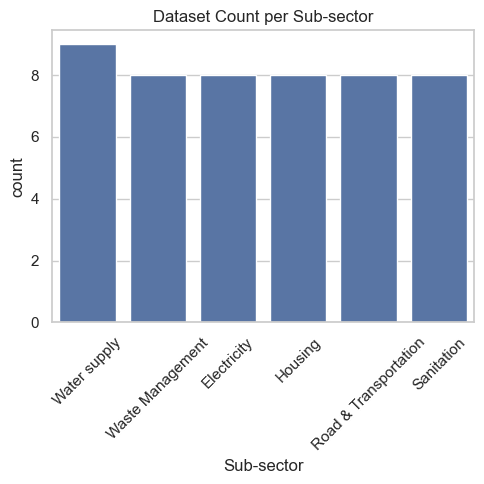

In [43]:
# ========================
# 1. Datasets per Sub-sector
# ========================
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Sub-sector', order=df['Sub-sector'].value_counts().index)
plt.title('Dataset Count per Sub-sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sub_sector_count.png')
plt.show()

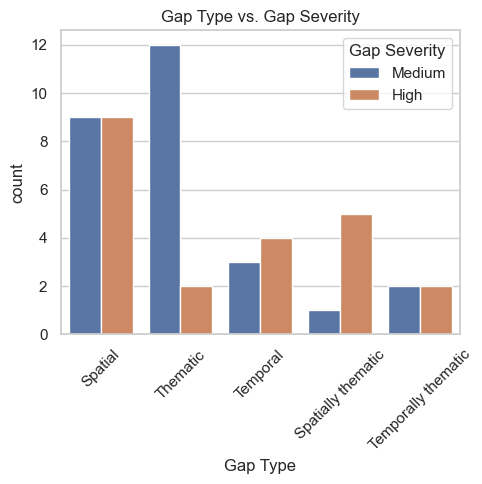

In [45]:
# ========================
# 2. Gap Type vs Gap Severity
# ========================
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Gap Type', hue='Gap Severity')
plt.title('Gap Type vs. Gap Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('gap_type_severity.png')
plt.show()

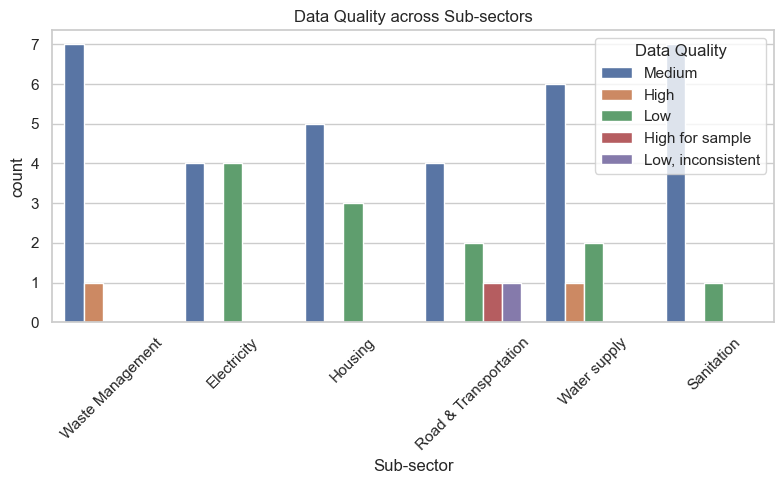

In [53]:
# ========================
# 3. Data Quality by Sub-sector
# ========================
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sub-sector', hue='Data Quality')
plt.title('Data Quality across Sub-sectors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('data_quality_subsector.png')
plt.show()

In [59]:
# Replacing some values
df['Data Availability'] = df['Data Availability'].replace({
    'Not available': 'Not Available',
    'Partially available': 'Partially Available'
})

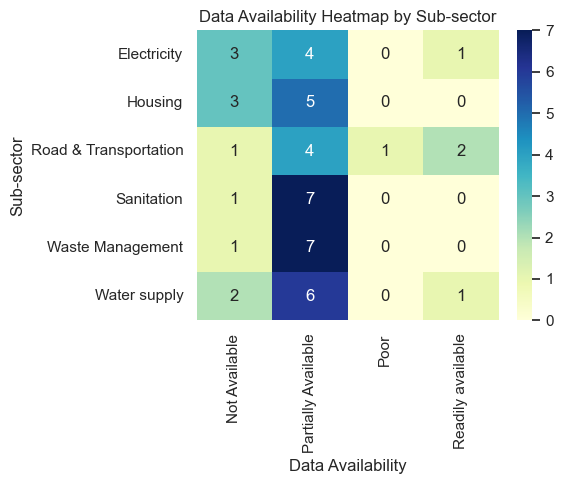

In [61]:
# ========================
# 4. Data Availability Heatmap
# ========================
# Create a crosstab for availability by sub-sector
avail_table = pd.crosstab(df['Sub-sector'], df['Data Availability'])
plt.figure(figsize=(6,5))
sns.heatmap(avail_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Data Availability Heatmap by Sub-sector')
plt.tight_layout()
plt.savefig('data_availability_heatmap.png')
plt.show()


In [65]:
# Replace structured with Structured
df['Data Structure'] =df['Data Structure'].replace('structured', 'Structured')

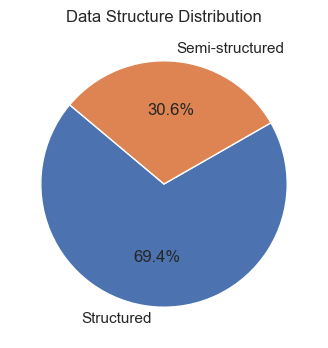

In [69]:
# ========================
# 5. Pie Chart - Data Structure
# ========================
# Show proportion of structured vs. semi-structured data
data_structure_counts = df['Data Structure'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(data_structure_counts, labels=data_structure_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Data Structure Distribution')
plt.savefig('data_structure_pie.png')
plt.show()

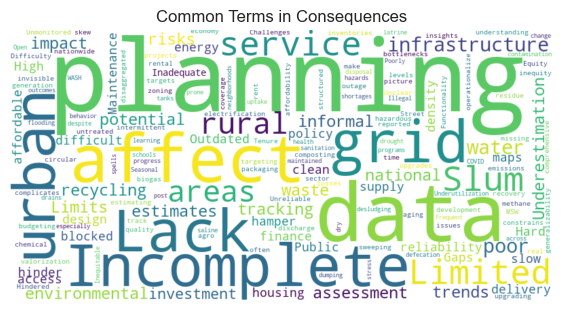

In [75]:
# ========================
# 7. WordCloud of Consequences
# ========================
# Combine all text from the consequences column
text = ' '.join(df['Consequences'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Terms in Consequences')
plt.savefig('consequences_wordcloud.png')

In [83]:
# ========================
# 6. Choropleth Map by Country Dataset Count
# ========================
# Aggregate dataset count by country
country_count = df['Country'].value_counts().reset_index()
country_count.columns = ['Country', 'Dataset Count']
# Plot interactive map showing count per African country
fig = px.choropleth(country_count, locations="Country", locationmode='country names',
                    color="Dataset Count", scope="africa",
                    title="Dataset Count per African Country")
fig.write_html("choropleth_dataset_count.html")